In [4]:
!pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Parsing the file content into a structured format (DataFrame)

In [5]:
import pandas as pd


data = []

# Splitting the file into lines and then into fields
lines = open("train_data.txt", encoding="UTF-8").readlines()
for line in lines:
    if line.strip():  # Checking if the line is not empty
        fields = line.split(' ::: ')
        if len(fields) == 4:  # Ensuring that there are exactly 4 fields
            record = {
                'Title': fields[1],
                'Genre': fields[2],
                'Description': fields[3]
            }
            data.append(record)

# Converting the list of dictionaries to a DataFrame for better visualization
df = pd.DataFrame(data)
df.head()  # Displaying the first few records to verify the parsing


,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [6]:
!pip install numpy
!pip install scipy
!pip install seaborn
!pip install matplotlib
!pip install sklearn
!pip install IPython



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [18 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  
  If the previous advice does not cover your use case, feel 


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
# Create a new dataframe with two columns
    df1 = df[['Description', 'Genre']].copy()



df1.shape

(54214, 2)

In [11]:
pd.DataFrame(df.Genre.unique()).values

array([['drama'],
       ['thriller'],
       ['adult'],
       ['documentary'],
       ['comedy'],
       ['crime'],
       ['reality-tv'],
       ['horror'],
       ['sport'],
       ['animation'],
       ['action'],
       ['fantasy'],
       ['short'],
       ['sci-fi'],
       ['music'],
       ['adventure'],
       ['talk-show'],
       ['western'],
       ['family'],
       ['mystery'],
       ['history'],
       ['news'],
       ['biography'],
       ['romance'],
       ['game-show'],
       ['musical'],
       ['war']], dtype=object)

In [12]:
# let's work with a smaller smaple of the data to speed things up
df2 = df1.sample(10000, random_state=1).copy()

In [14]:
pd.DataFrame(df2.Genre.unique())
df2.Genre.value_counts()

Genre
drama          2589
documentary    2378
comedy         1396
short           940
horror          397
thriller        276
action          239
western         184
family          158
reality-tv      156
adventure       135
romance         135
sci-fi          128
adult           113
music           110
crime            91
talk-show        83
animation        79
sport            77
fantasy          59
history          56
mystery          51
musical          46
biography        41
news             33
game-show        30
war              20
Name: count, dtype: int64

In [15]:
# Create a new column 'category_id' with encoded categories
df2['category_id'] = df2['Genre'].factorize()[0]
category_id_df = df2[['Genre', 'category_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Genre']].values)

# New dataframe
df2.head()

,Description,Genre,category_id
10689,This documentary film is a heartfelt glimpse a...,documentary,0
32392,"According to an old Chinese fairytale, the god...",short,1
47445,"In 1929, in Chicago, 12 year old Larry Adler w...",short,1
11729,England Cricket hero Freddie Flintoff spends e...,adventure,2
1298,Three gravediggers lovingly maintain the peace...,documentary,0


In [16]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2),
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df2.Description).toarray()

labels = df2.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 10000 complaints is represented by 15667 features (TF-IDF score of unigrams and bigrams)


In [17]:
X = df2['Description'] # Collection of documents
y = df2['Genre'] # Target or the labels we want to predict (i.e., the 13 different complaints of Genres)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state = 20)

In [18]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\Nikita\PycharmProjects\nlp_movies\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Nikita\PycharmProjects\nlp_movies\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Nikita\PycharmProjects\nlp_movies\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Nikita\PycharmProjects\nlp_movies\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppres

In [19]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1,
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.5466,0.009711
LogisticRegression,0.5206,0.010121
MultinomialNB,0.4537,0.008892
RandomForestClassifier,0.4017,0.007759


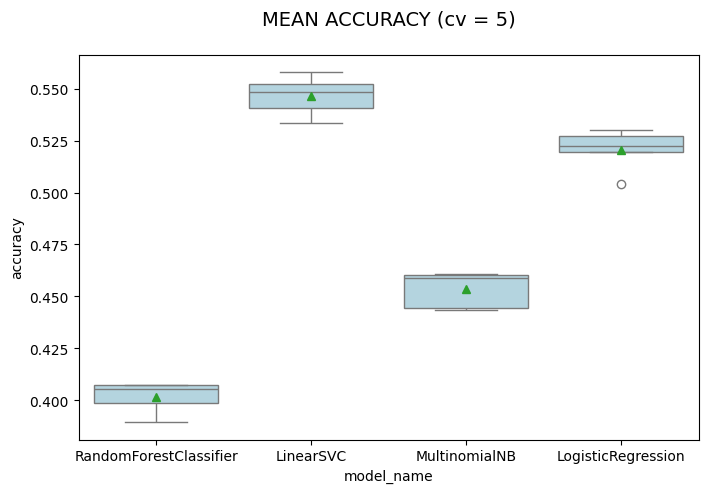

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy',
            data=cv_df,
            color='lightblue',
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [21]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features,
                                                               labels,
                                                               df2.index, test_size=0.25,
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Nikita\PycharmProjects\nlp_movies\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [23]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred,
                                    target_names= df2['Genre'].unique()))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

 documentary       0.63      0.84      0.72       592
       short       0.38      0.24      0.30       249
   adventure       0.22      0.09      0.13        22
       drama       0.52      0.72      0.60       623
      comedy       0.50      0.54      0.52       364
    thriller       0.26      0.14      0.18        57
      family       0.50      0.10      0.16        42
  reality-tv       0.55      0.18      0.27        33
       adult       0.69      0.33      0.45        27
      action       0.37      0.21      0.27        53
      horror       0.60      0.52      0.56       105
     mystery       0.00      0.00      0.00         9
     romance       0.50      0.03      0.06        34
       music       0.69      0.30      0.42        30
   animation       0.00      0.00      0.00        17
     western       1.00      0.68      0.81        57
     history       0.00      0.00      0.00        1

C:\Users\Nikita\PycharmProjects\nlp_movies\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nikita\PycharmProjects\nlp_movies\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nikita\PycharmProjects\nlp_movies\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

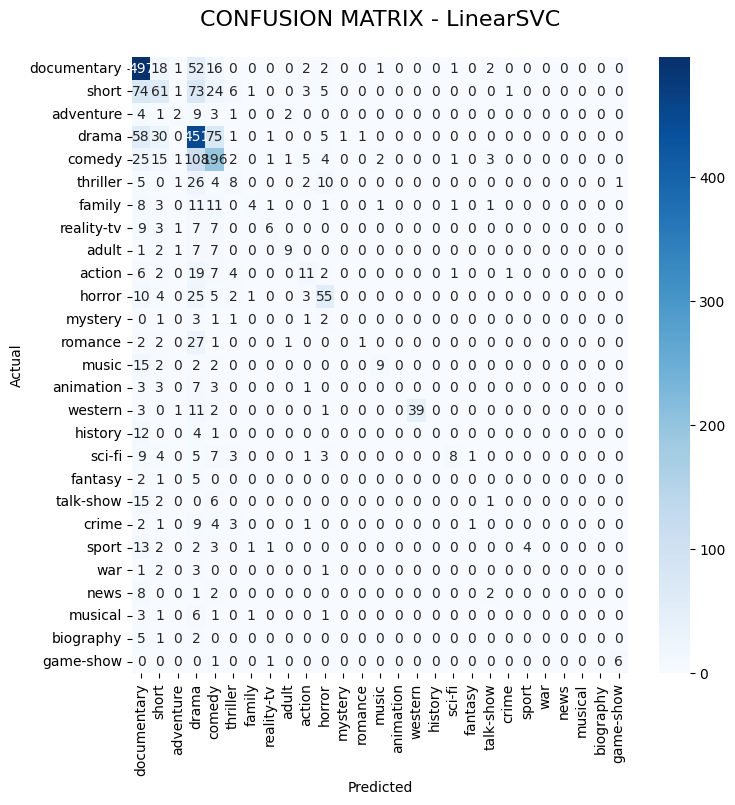

In [24]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Genre.values,
            yticklabels=category_id_df.Genre.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [25]:
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 20:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual],
                                                           id_to_category[predicted],
                                                           conf_mat[actual, predicted]))

      display(df2.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Genre',
                                                                'Description']])
      print('')

'short' predicted as 'documentary' : 74 examples.


,Genre,Description
14522,short,Khush means ecstatic pleasure in Urdu. For Sou...
39682,short,the film is talking about a person who is maki...
51680,short,"""This active little animal has made a great hi..."
25735,short,"We live in a hectic worked, where everyone jus..."
48496,short,"On the march for progress, mankind kept wastin..."
...,...,...
49239,short,Steve McQueen multiply remakes the most famous...
14451,short,A mockumentary showcasing terrorism paranoia i...
5776,short,Water is more than just a simple mixture of hy...
53154,short,"A long, long night has come. It will continue ..."



'drama' predicted as 'documentary' : 58 examples.


,Genre,Description
36971,drama,"1888: a luthier, Vedder (Gijs Scholten van Asc..."
24244,drama,Deceptively simple and with unsettling intelli...
37088,drama,"For the children of Northern Ireland, violence..."
18210,drama,"The inspiring true story of ""Brundibar,"" an or..."
27882,drama,"Devenir, a movie made with less than $6000 Dol..."
24585,drama,"In the aftermath of the 1967 defeat, four youn..."
10886,drama,"In 1930's Shanghai, Wu Sunpu, chief executive ..."
30024,drama,"Olga, Katya, and Andrey have known each other ..."
4274,drama,The industries are shutting down and jobs are ...
11894,drama,Donde cae el sol tells a little story between ...



'comedy' predicted as 'documentary' : 25 examples.


,Genre,Description
29097,comedy,"Filmed in the O.C., the show features explosiv..."
26375,comedy,Extreme hidden camera comedy at its finest. Si...
23147,comedy,"""My Hair Song"" is a song where comedic duo Rhe..."
48235,comedy,Charles Dickens' classic heart warming tale......
52992,comedy,On the morning of 31st December at a Belgrade ...
46220,comedy,Robin Turner is a gay hairdresser. He hates hi...
51874,comedy,"The film narrates a utopian abandonment, conse..."
44299,comedy,Best-selling author and noted history professo...
33200,comedy,As Brasileiras (The Brazilian Women) is a Braz...
2862,comedy,Snakeville is the story of a neglected town ha...



'drama' predicted as 'short' : 30 examples.


,Genre,Description
18947,drama,'The Life of Insects' will be a dark comedy ba...
45327,drama,The security guard Luther Bentley begins heari...
24545,drama,Unfulfilled housewife Allison (Darian Caine) s...
2510,drama,The film offers a glimpse at a group of school...
45468,drama,"""Flourishing Life"" is a story of a young man, ..."
311,drama,"Moving Picture World, 19 August 1922. John Car..."
34153,drama,A woman's pain takes her on a dark journey whe...
16980,drama,"A mechanical man, within an elaborate shooting..."
28340,drama,Drama runs deep with betrayal between friends ...
48283,drama,In Winter is an independent feature emerging f...



'documentary' predicted as 'drama' : 52 examples.


,Genre,Description
27319,documentary,'Lucky Me' is a documentary profiling the life...
36390,documentary,"Ralph Nieves, a charismatic Latino former unde..."
38346,documentary,This is an extraordinary tale of an amazing fr...
24929,documentary,What makes a jet setting 'power-blonde' busine...
15500,documentary,Spanning the globe in search of living stigmat...
16768,documentary,Two vastly different men in vastly different p...
20435,documentary,Approximately 2000 summer cinemas have existed...
2072,documentary,"Equipped with seven draft picks, follow the Ma..."
5171,documentary,Alessandro Gualtieri is an independent rebel p...
12323,documentary,Passing time fills a central role in Baderech ...



'short' predicted as 'drama' : 73 examples.


,Genre,Description
47161,short,An emotional story of a husband that is rarely...
4216,short,A young woman escapes her habitual tasks throu...
3946,short,Three young desperados are chasing a colony of...
14097,short,None flowers in the garden can not be compared...
29746,short,What happens when a female Polish capitalist m...
...,...,...
46114,short,Twelve-year old Maggie likes to build miniatur...
13784,short,"When Noelle was one, her mother abandoned her ..."
12936,short,Escaping from a boring and oppressive adult wo...
52575,short,"""Wintergartenprogramm"" is a collection of snip..."



'comedy' predicted as 'drama' : 108 examples.


,Genre,Description
1197,comedy,"Soriano brothers Dennis, Chipipoy/Chip, and Je..."
38041,comedy,A divorced director and his theatre company de...
20197,comedy,When Lambodar Bhatt is given the opportunity t...
41281,comedy,Bobby Ray Summers is a 30-year-old unmarried j...
29467,comedy,Scatterbrained Sally Elliott tries to get a jo...
...,...,...
34913,comedy,Larry (Jason Schwartzman) is content with his ...
14713,comedy,Walter Duts lives a quite existence in a rural...
40207,comedy,In order to avenge his insult against wealthy ...
3739,comedy,"Lonnie, Dominic and 'G' are three bachelor bud..."



'thriller' predicted as 'drama' : 26 examples.


,Genre,Description
40884,thriller,Michael Barrymore's life changes dramatically ...
16882,thriller,Former prom queen Joy is now an agoraphobic ho...
33694,thriller,"After a near-death experience overseas, war co..."
43537,thriller,Weil er brutalen Dealern das Handwerk legen wi...
45512,thriller,"""In the life of every person there are inflect..."
52955,thriller,Sensitive wallflower Cara exists in her humdru...
34680,thriller,"A trio of naive, but eager young Midwestern wo..."
18140,thriller,"Carmen a widower has two daughters, Anna and C..."
13101,thriller,Chehere is a period drama set in the 1950s tha...
20499,thriller,After losing his family in a car accident and ...



'horror' predicted as 'drama' : 25 examples.


,Genre,Description
48719,horror,Steve is a successful businessman in Dallas. O...
46559,horror,A young women (Julie Summers) must return to h...
43090,horror,When your character received the message that ...
21922,horror,Six friends go out to the middle of nowhere on...
33328,horror,An independent film company sends a videograph...
4241,horror,EVERETT TURNER is a Santa Barbara police offic...
4620,horror,One man's struggle to contain the curse he hid...
29837,horror,Claire Brennen stars as a waitress who leaves ...
24036,horror,The Candyman moves on to New Orleans and start...
39505,horror,A SAVANNAH HAUNTING is a supernatural thriller...



'romance' predicted as 'drama' : 27 examples.


,Genre,Description
34031,romance,"A couple meet, after a separation - perhaps fo..."
30993,romance,When Fleur arrives on her brother Hugo's doors...
34028,romance,Mann Kapoor lives a middle-class lifestyle in ...
38852,romance,Jaanu is a rich 19-year-old girl has a family ...
50207,romance,A radio-reporter watches a window-washer and t...
3281,romance,"This is the story of Venu, a middle class youn..."
377,romance,Provincial singer Andrei dreams of fame. When ...
52971,romance,This is a web series with different segments o...
18709,romance,A Euro tunnel love affair as mild manner Engli...
46689,romance,Times change - the characters change. But how ...



'short' predicted as 'comedy' : 24 examples.


,Genre,Description
15126,short,Emily and Aidan have a chance meeting at a bar...
39608,short,A determined young artist will do anything to ...
53513,short,"Frank, an awkward slouchy man, daydreams about..."
19236,short,A grandmother talks about the love affairs of ...
3850,short,"Florin a thirty something, is coming back from..."
32104,short,"Evelyne's lover has just broken up with her, w..."
1068,short,A romantic comedy about a high school bully wh...
10669,short,"""Slice of Pie"" is a romantic comedy with an un..."
178,short,The story surrounds the boyfriend; having met ...
23121,short,Todd always does his best to go above and beyo...



'drama' predicted as 'comedy' : 75 examples.


,Genre,Description
19938,drama,"""Here is to friends."" As Terry, Jensen and Wil..."
41741,drama,"An 11-year-old street boy, Obdulio, who sells ..."
38283,drama,A beautiful and ambitious young woman leaves h...
35020,drama,Sgt. Kevin Hill is a 22 year-old US Army Range...
3634,drama,"Ruby and Garnet are identical twins, ten years..."
...,...,...
39382,drama,Oridam is a quest of a sex worker to find a pl...
31002,drama,Jason is an advertising executive whose life i...
17071,drama,On the last day of school to celebrate graduat...
53856,drama,A woman is desperate to find real love in a st...
